In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
filename


Saving slr12.csv to slr12.csv


'slr12.csv'

In [2]:
import pandas as pd
df = pd.read_csv(filename)
df.head()

,AnnualFranchiseFee,StartUpCost
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  r2_score, mean_squared_error


In [4]:
x = df['AnnualFranchiseFee'].values
y = df['StartUpCost'].values


In [5]:
def get_mean(arr):
    return np.sum(arr)/len(arr)

def get_variance(arr, mean):
    return np.sum((arr-mean)**2)

def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x-mean_y)*(arr_y - mean_y)
    return np.sum(final_arr)

In [9]:
def get_coefficients(x, y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    m = get_covariance(x, x_mean, y, y_mean) / get_variance(x, x_mean)
    c = y_mean -x_mean*m
    return m, c

In [12]:
def linear_regression(x_train, y_train, x_test, y_test):
    prediction = []
    m, c = get_coefficients(x_train, y_train)
    for x in x_test:
        y= m*x +c
        prediction.append(y)
    mse = mean_squared_error(prediction, y_test)
    print('The MSE score of the model is : ' , mse)
    return prediction


In [13]:
linear_regression(x[:30], y[:30], x[30:], y[30:])

The MSE score of the model is :  97482.15509744159


[863.289158105108,
 1237.641407005659,
 813.3755249183679,
 1013.0300576653284,
 1013.0300576653284,
 963.1164244785883]

In [14]:
def plot_reg_line(x, y):
    prediction = []
    m, c = get_coefficients(x, y)
    for x0 in range(650, 1400):
        yhat = m*x0 +c
        prediction.append(yhat)
    fig = plt.figure(figsize=(20, 7))
    plt.subplot(1,2,1)
    sns.scatterplot(x=x, y=y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot between x and y')

    plt.subplot(1,2,2)
    sns.scatterplot(x=x, y=y, color ='blue')
    sns.lineplot(x= [i for i in range(650, 1400)], y = prediction, color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regression Plot')
    plt.show()  

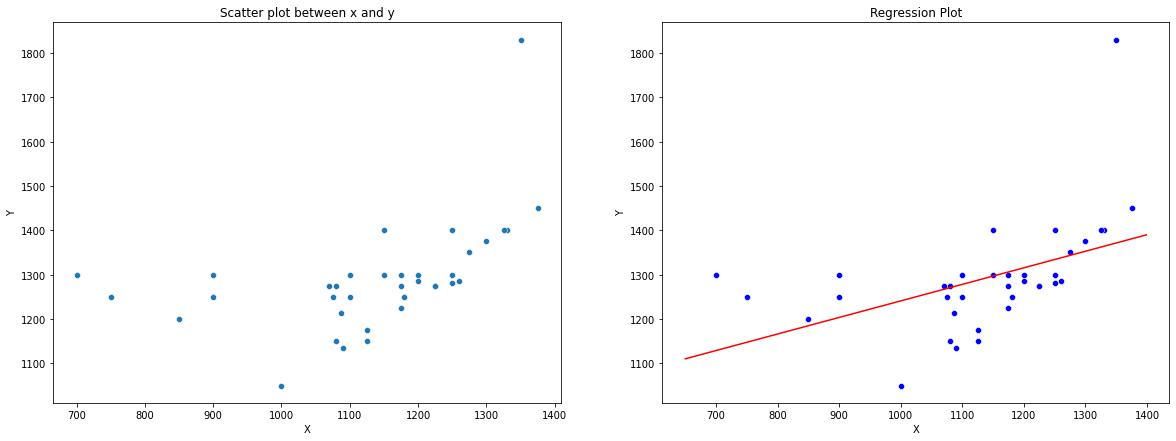

In [15]:
plot_reg_line(x, y)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression


In [19]:
x = df['AnnualFranchiseFee'].values
y = df['StartUpCost'].values

reg = LinearRegression()
reg.fit(x[:30].reshape(-1,1), y[:30])
prediction = reg.predict(x[30:].reshape(-1,1))
mse = mean_squared_error(prediction, y[30:])
print('The MSE score of the model is : ' , mse)

The MSE score of the model is :  97482.15509744169


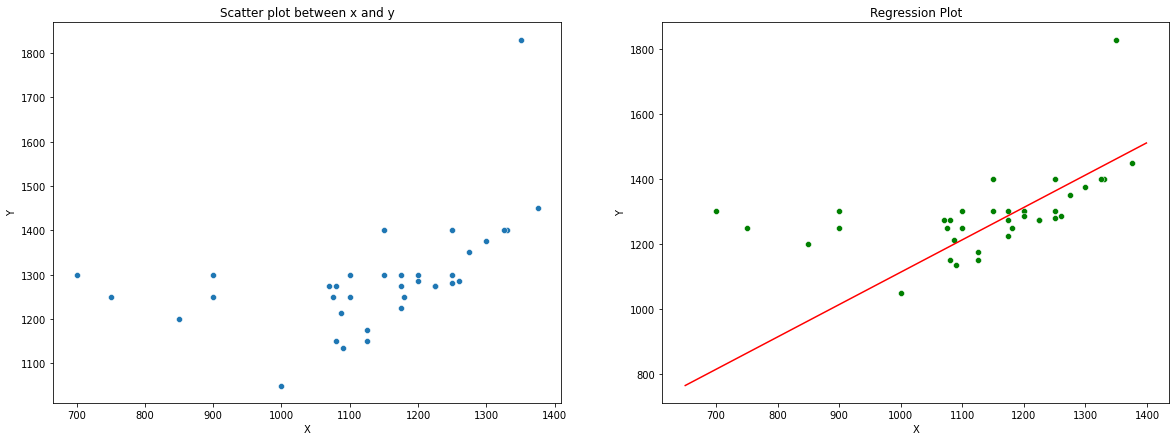

In [25]:
prediction = reg.predict(np.array([i for i in range(650, 1400)]).reshape(-1,1))

fig = plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.scatterplot(x=x, y=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot between x and y')

plt.subplot(1,2,2)
sns.scatterplot(x=x, y=y, color ='green')
sns.lineplot(x= [i for i in range(650, 1400)], y = prediction, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Plot')
plt.show()  